In [1]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import re
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import scimap as sm  
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr

#set current directory
os.chdir("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data_e41")
import napari

Running SCIMAP  2.1.0


In [2]:
adata=ad.read("./e41_all_cells_v4.h5ad")

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\anndata\__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



In [3]:
adata

AnnData object with n_obs × n_vars = 743384 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'phenotype', 'MEL_id', 'B2Mpos', 'ROI_rename'
    uns: 'all_markers', 'gates', 'spatial_distance'

In [4]:
sm.hl.classify(adata, pos=['MART1'], neg=None, classify_label='MART1+', phenotype='phenotype', 
               subclassify_phenotype='Melanocytes', threshold=0.5, collapse_failed=False, label='MART1pos')
rename= {'MART1+': ['MART1+'],
        'MART1-':['Melanocytes']}
adata = sm.hl.rename(adata, rename, from_column='MART1pos', to_column='MART1pos')

Renaming MART1+ to MART1+
Renaming Melanocytes to MART1-


In [5]:
sm.hl.classify(adata, pos=['PMEL'], neg=None, classify_label='PMEL+', phenotype='phenotype', 
               subclassify_phenotype='Melanocytes', threshold=0.5, collapse_failed=False, label='PMELpos')
rename= {'PMEL+': ['PMEL+'],
        'PMEL-':['Melanocytes']}
adata = sm.hl.rename(adata, rename, from_column='PMELpos', to_column='PMELpos')

Renaming PMEL+ to PMEL+
Renaming Melanocytes to PMEL-


In [6]:
sm.hl.classify(adata, pos=['ECAD'], neg=None, classify_label='ECAD+', phenotype='phenotype', 
               subclassify_phenotype='Melanocytes', threshold=0.5, collapse_failed=False, label='ECADpos')
rename= {'ECAD+': ['ECAD+'],
        'ECAD-':['Melanocytes']}
adata = sm.hl.rename(adata, rename, from_column='ECADpos', to_column='ECADpos')

Renaming ECAD+ to ECAD+
Renaming Melanocytes to ECAD-


In [14]:
sm.hl.classify(adata, pos=['SOX9'], neg=None, classify_label='SOX9+', phenotype='phenotype', 
               subclassify_phenotype='Melanocytes', threshold=0.5, collapse_failed=False, label='SOX9pos')
rename= {'SOX9+': ['SOX9+'],
        'SOX9-':['Melanocytes']}
adata = sm.hl.rename(adata, rename, from_column='SOX9pos', to_column='SOX9pos')

Renaming SOX9+ to SOX9+
Renaming Melanocytes to SOX9-


In [26]:
sm.hl.classify(adata, pos=['S100A1'], neg=None, classify_label='S100A+', phenotype='phenotype', 
               subclassify_phenotype='Melanocytes', threshold=0.5, collapse_failed=False, label='S100Apos')
rename= {'S100A+': ['S100A+'],
        'S100A-':['Melanocytes']}
adata = sm.hl.rename(adata, rename, from_column='S100Apos', to_column='S100Apos')

Renaming S100A+ to S100A+
Renaming Melanocytes to S100A-


In [18]:
rename= {'MEL18_015': ['LSP13135_015'],
        'MEL18_016':['LSP13135_016'],
        'MEL18_027':['LSP13135_027'],
        'MEL18_026':['LSP13135_026']}
adata = sm.hl.rename(adata, rename, from_column='ROI', to_column='ROI_MEL18')

Renaming LSP13135_015 to MEL18_015
Renaming LSP13135_016 to MEL18_016
Renaming LSP13135_027 to MEL18_027
Renaming LSP13135_026 to MEL18_026


In [29]:
sample = ['MEL18']
adata_MEL18=adata[(adata.obs['MEL_id'].isin(sample))]

y=['MART1-','MART1+']
x=['MEL18_015','MEL18_016','MEL18_027','MEL18_026']
b=sm.pl.stacked_barplot(adata_MEL18, y_axis='MART1pos', x_axis='ROI_MEL18', 
                      subset_xaxis=x, subset_yaxis=y, order_xaxis=None, order_yaxis=None, 
                      method='percent', figsize=(2,3), return_data=True, fileName='MEL18_geoMX_MART1.pdf', saveDir='C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/')

Saved plot to C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/MEL18_geoMX_MART1.pdf


In [30]:
sample = ['MEL18']
adata_MEL18=adata[(adata.obs['MEL_id'].isin(sample))]

y=['SOX9-','SOX9+']
x=['MEL18_015','MEL18_016','MEL18_027','MEL18_026']
b=sm.pl.stacked_barplot(adata_MEL18, y_axis='SOX9pos', x_axis='ROI_MEL18', 
                      subset_xaxis=x, subset_yaxis=y, order_xaxis=None, order_yaxis=None, 
                      method='percent', figsize=(2,3), return_data=True, fileName='MEL18_geoMX_SOX9.pdf', saveDir='C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/')

Saved plot to C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/MEL18_geoMX_SOX9.pdf


In [31]:
sample = ['MEL18']
adata_MEL18=adata[(adata.obs['MEL_id'].isin(sample))]

y=['S100A-','S100A+']
x=['MEL18_015','MEL18_016','MEL18_027','MEL18_026']
b=sm.pl.stacked_barplot(adata_MEL18, y_axis='S100Apos', x_axis='ROI_MEL18', 
                      subset_xaxis=x, subset_yaxis=y, order_xaxis=None, order_yaxis=None, 
                      method='percent', figsize=(2,3), return_data=True, fileName='MEL18_geoMX_S100A.pdf', saveDir='C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/')

Saved plot to C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/MEL18_geoMX_S100A.pdf


In [32]:
sample = ['MEL18']
adata_MEL18=adata[(adata.obs['MEL_id'].isin(sample))]

y=['PMEL-','PMEL+']
x=['MEL18_015','MEL18_016','MEL18_027','MEL18_026']
b=sm.pl.stacked_barplot(adata_MEL18, y_axis='PMELpos', x_axis='ROI_MEL18', 
                      subset_xaxis=x, subset_yaxis=y, order_xaxis=None, order_yaxis=None, 
                      method='percent', figsize=(2,3), return_data=True, fileName='MEL18_geoMX_PMEL.pdf', saveDir='C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/')

Saved plot to C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/MEL18_geoMX_PMEL.pdf


In [33]:
# Load the ROI CSV file
roi_df = pd.read_csv(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e41\LSP11402.ome.tif-old-1728087-rois.csv")

adata = sm.hl.addROI_omero(adata, roi=roi_df, label='MEL25_ROI_geoMX')

In [34]:
adata

AnnData object with n_obs × n_vars = 743384 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'phenotype', 'MEL_id', 'B2Mpos', 'ROI_rename', 'MART1pos', 'PMELpos', 'ECADpos', 'SOX9pos', 'S100Apos', 'ROI_MEL18', 'MEL25_ROI_geoMX'
    uns: 'all_markers', 'gates', 'spatial_distance'

In [35]:
adata.obs.MEL25_ROI_geoMX.value_counts()

MEL25_ROI_geoMX
Other           736253
LSP13145_061      2909
LSP13145_065      2414
LSP13145_059      1145
LSP13145_062       663
Name: count, dtype: int64

In [36]:
rename= {'MEL25_061': ['LSP13145_061'],
        'MEL25_065':['LSP13145_065'],
        'MEL25_059':['LSP13145_059'],
        'MEL25_062':['LSP13145_062']}
adata = sm.hl.rename(adata, rename, from_column='MEL25_ROI_geoMX', to_column='MEL25_ROI_geoMX')

Renaming LSP13145_061 to MEL25_061
Renaming LSP13145_065 to MEL25_065
Renaming LSP13145_059 to MEL25_059
Renaming LSP13145_062 to MEL25_062


In [47]:
sample = ['MEL25']
adata_MEL25=adata[(adata.obs['MEL_id'].isin(sample))]

y=['S100A-','S100A+']
x=['MEL25_061','MEL25_062','MEL25_065','MEL25_059']
b=sm.pl.stacked_barplot(adata_MEL25, y_axis='S100Apos', x_axis='MEL25_ROI_geoMX', 
                      subset_xaxis=x, subset_yaxis=y, order_xaxis=x, order_yaxis=None, 
                      method='percent', figsize=(2,3), return_data=True, fileName='MEL25_geoMX_S100A.pdf', saveDir='C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/')

Saved plot to C:/Users/tav9/HMS Dropbox/Tuulia Vallius/test/test/MEL25_geoMX_S100A.pdf


In [48]:
#Image path

LSP11314 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11314/registration/LSP11314.ome.tif"
LSP11330 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11330/registration/LSP11330.ome.tif"
LSP11349 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11349/registration/LSP11349.ome.tif"
LSP11354 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11354/registration/LSP11354.ome.tif"
LSP11402 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11402/registration/LSP11402.ome.tif"
LSP11410 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11410/registration/LSP11410.ome.tif"
LSP11522 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11522/registration/LSP11522.ome.tif"
LSP11530 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11530/registration/LSP11530.ome.tif"
LSP11562 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11562/registration/LSP11562.ome.tif"
LSP11634 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11634/registration/LSP11634.ome.tif"
LSP11706 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11706/registration/LSP11706.ome.tif"
LSP11754 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11754/registration/LSP11754.ome.tif"
LSP11778 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11778/registration/LSP11778.ome.tif"
LSP11786 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11786/registration/LSP11786.ome.tif"
LSP11373 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11373/registration/LSP11373.ome.tif"
LSP11450 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11450/registration/LSP11450.ome.tif"
LSP11474 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11474/registration/LSP11474.ome.tif"
LSP11482 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11482/registration/LSP11482.ome.tif"
LSP11490 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11490/registration/LSP11490.ome.tif"
LSP11498 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11498/registration/LSP11498.ome.tif"
LSP11618 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11618/registration/LSP11618.ome.tif"
LSP11642 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11642/registration/LSP11642.ome.tif"
LSP11658 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11658/registration/LSP11658.ome.tif"
LSP11698 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP11698/registration/LSP11698.ome.tif"
LSP12424 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCA_p16_e41_tumor_intrinsic/quantified/LSP12424/registration/LSP12424.ome.tif"

In [49]:
all_markers = ['DNA1','5hmC','Tet2','SOX10','DNA2','LaminA/C/B1','GATA3','PMEL','DNA3','SOX9','S100B','MART1','aSMA','DNA4','MITF','CD63','p21','panCK','DNA5','ECAD','pSTAT1','MCM2','S100A1','DNA6','Ki67','pSTAT3','PD1','pH3','DNA7','PRAME','IRF5','IRF1','B2M','DNA8','MX1','CD11c','NGFR','CK14','DNA9','LDH','pERK','BCL2','VIM','DNA10','CD3e','SOX2','MCL1','pS6','DNA11','CCND1','CCNA2','PDL1','PCNA','DNA12','p16/CDKN2A','SOX6','HIF1a','H3k27me3']

sm.pl.image_viewer(image_path = LSP11402, adata=adata, overlay='MART1pos', 
                   channel_names=all_markers, x_coordinate='X_centroid', y_coordinate='Y_centroid', 
                   point_size=10, subset='LSP11402')

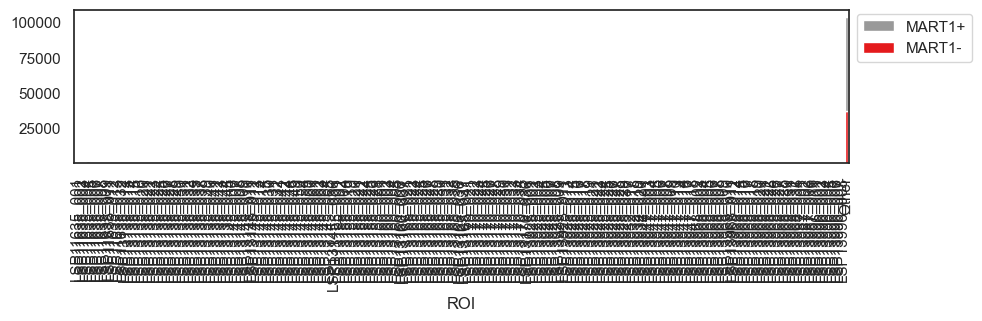

In [8]:
y=['MART1-','MART1+']
b=sm.pl.stacked_barplot(adata, y_axis='MART1pos', x_axis='ROI', 
                      subset_xaxis=None, subset_yaxis=y, order_xaxis=None, order_yaxis=y, 
                      method='absolute', figsize=(10,2), return_data=True)
b.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\MART1pos_GeoMX_ROIs_absolute_e41.csv")
b=pd.read_csv(r"C:\Users\tav9\Dropbox (HMS)\test\MART1pos_GeoMX_ROIs_absolute_e41.csv")

In [13]:
adata.obs.phenotype.value_counts()

phenotype
Unknown            169169
Melanocytes        168407
Keratinocytes      156508
T cells            139716
Myeloid lineage     90649
Myofibroblasts      18935
Name: count, dtype: int64

In [14]:
#mean MART1 intensity in tumor cells /geomx ROI

group = ['Melanocytes']
adata_tumor=adata[(adata.obs['phenotype'].isin(group))]

group = ['LSP11635_001','LSP11635_002','LSP11635_003','LSP11635_004','LSP11635_005','LSP11635_006','LSP11635_007','LSP11635_008','LSP11635_009','LSP11635_011','LSP11635_012','LSP11635_013','LSP11635_032','LSP13135_012','LSP13135_013','LSP13135_014','LSP13135_015','LSP13135_016','LSP13135_020','LSP13135_021','LSP13135_022','LSP13135_023','LSP13135_024','LSP13135_025','LSP13135_026','LSP13135_027','LSP13135_028','LSP13135_029','LSP13135_030','LSP13135_031','LSP13135_032','LSP13135_033','LSP13135_035','LSP13135_037','LSP13135_038','LSP13135_039','LSP13135_040','LSP13135_041','LSP13135_042','LSP13135_043','LSP13135_044','LSP13135_045','LSP13145_006','LSP13145_007','LSP13145_008','LSP13145_009','LSP13145_010','LSP13145_011','LSP13145_012','LSP13145_013','LSP13145_014','LSP13145_015','LSP13145_030','LSP13145_031','LSP13145_032','LSP13145_041','LSP13145_042','LSP13145_044','LSP13145_046','LSP13145_049','LSP13145_050','LSP13145_054','LSP13145_059','LSP13145_060','LSP13145_061','LSP13145_062','LSP13145_063','LSP13145_064','LSP13145_065','LSP13145__036','LSP13155_001','LSP13155_002','LSP13155_004','LSP13155_010','LSP13155_019','LSP13155_020','LSP13155_021','LSP13155_022','LSP13155_024','LSP13155_025','LSP13155_026','LSP13155_028','LSP13160_001','LSP13160_002','LSP13160_003','LSP13160_004','LSP13160_005','LSP13160_006','LSP13160_007','LSP13165_021','LSP13165_022','LSP13165_023','LSP13165_024','LSP13165_025','LSP13165_026','LSP13165_027','LSP13165_028','LSP13165_029','LSP13165_030','LSP13165_031','LSP13165_032','LSP13165_033','LSP13165_035','LSP13165_036','LSP13165_037','LSP13165_041','LSP13170_021','LSP13170_022','LSP13170_023','LSP13170_024','LSP13170_025','LSP13170_026','LSP13170_027','LSP13170_028','LSP13170_029','LSP13170_030','LSP13170_031','LSP13170_032','LSP13170_033','LSP13170_034','LSP13170_035','LSP13170_036','LSP13925_001','LSP13925_002','LSP13925_003','LSP13925_004','LSP13925_005','LSP13925_006','LSP13925_007','LSP13925_008','LSP13925_009','LSP13925_011','LSP13925_013','LSP13925_014','LSP13925_015','LSP13925_016','LSP13925_017','LSP13925_018','LSP13925_019','LSP13925_021','LSP13925_022','LSP13925_023','LSP13925_024','LSP13925_025','LSP13925_026','LSP13925_027','LSP13925_028','LSP13925_029','LSP13925_030','LSP13932_017','LSP13932_018','LSP13932_019','LSP13932_020','LSP13947_001','LSP13947_003','LSP13947_004','LSP13947_005','LSP13947_006','LSP13947_007','LSP13947_008','LSP13947_009','LSP13947_010','LSP13947_013','LSP13947_014','LSP13947_016','LSP13947_017','LSP13947_018','LSP13968_002','LSP13968_003','LSP13968_004','LSP13968_005','LSP13968_006','LSP13968_007','LSP13968_008','LSP13968_009','LSP13968_010','LSP13968_011','LSP13968_012','LSP13968_014','LSP13968_015','LSP13968_016','LSP13968_017','LSP13968_018','LSP13968_019','LSP13968_020','LSP13968_021','LSP13968_022','LSP13968_025','LSP13968_026','LSP13968_027','LSP13968_028','LSP13968_030','LSP13968_031','LSP13968_032','LSP13968_035','LSP13987_001','LSP13987_002','LSP13987_006','LSP13987_016','LSP13996_001','LSP13996_002','LSP13996_003','LSP13996_004','LSP13996_005','LSP13996_006','LSP13996_007','LSP13996_008']
adata_geomx=adata_tumor[(adata_tumor.obs['ROI'].isin(group))]

marker_expression = adata_geomx.X[:, adata_geomx.var.index == "MART1"].squeeze()
geomx_data = adata_geomx.obs["ROI"]
df = pd.DataFrame({"marker_expression": marker_expression, "geomx_ID": geomx_data})
print(df)

result = df.groupby("geomx_ID").agg({"marker_expression": "mean"}).reset_index()
print(result)
result.to_csv(r"C:\Users\tav9\Dropbox (HMS)\test\MART1_mean_intensity_GeoMX_ROIs_e41.csv")

                                  marker_expression      geomx_ID
LSP11314--unmicst_cellRing_21780           0.080150  LSP13947_001
LSP11314--unmicst_cellRing_21845           0.677760  LSP13947_001
LSP11314--unmicst_cellRing_21896           0.600498  LSP13947_001
LSP11314--unmicst_cellRing_21909           0.610724  LSP13947_001
LSP11314--unmicst_cellRing_21966           0.683444  LSP13947_001
...                                             ...           ...
LSP11658--unmicst_cellRing_57195           0.513892  LSP13968_005
LSP11658--unmicst_cellRing_57197           0.272173  LSP13968_005
LSP11658--unmicst_cellRing_57205           0.640258  LSP13968_005
LSP11658--unmicst_cellRing_57206           0.333340  LSP13968_005
LSP11658--unmicst_cellRing_57221           0.329926  LSP13968_005

[64417 rows x 2 columns]
         geomx_ID  marker_expression
0    LSP11635_001           0.371348
1    LSP11635_002           0.367826
2    LSP11635_003           0.672106
3    LSP11635_004           0.6879

C:\Users\tav9\AppData\Local\Temp\ipykernel_35192\1389051309.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [15]:
adata_geomx

View of AnnData object with n_obs × n_vars = 64417 × 42
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'phenotype', 'MEL_id', 'B2Mpos', 'ROI_rename', 'MART1pos'
    uns: 'all_markers', 'gates', 'spatial_distance'